## Use Selenium to Scrape Top Influencer User Id's

In [1]:
# # https://towardsdatascience.com/how-to-use-selenium-to-web-scrape-with-example-80f9b23a843a
# from selenium import webdriver
# # pip3 install chromedriver-binary
# import chromedriver_binary

In [2]:
# driver = webdriver.Chrome()

In [3]:
# driver.get('https://www.instagram.com/directory/profiles/')

In [4]:
# driver.find_element_by_xpath("""//*[@id="react-root"]/section/main/div/div[2]/div/ul[1]/li[1]/a""").click()

In [5]:
# driver.find_element_by_xpath("""//*[@id="react-root"]/section/main/div[1]/div[2]/div/ul[1]/li[1]/a""").click()

In [6]:
# posts = driver.find_elements_by_class_name('_7kTyW')

In [7]:
# user_ids = []
# for post in posts:
#     user_ids.append(post.text)

In [8]:
# driver.back()

In [9]:
# driver.find_element_by_xpath("""//*[@id="react-root"]/section/main/div/div[2]/div/ul[1]/li[2]/a""").click()

In [10]:
# posts = driver.find_elements_by_class_name('_7kTyW')

In [11]:
# for post in posts:
#     user_ids.append(post.text)

In [12]:
# len(user_ids)

In [13]:
# driver.back()

## Automate scrapping using loops to get user_id's

In [14]:
# from: https://www.instagram.com/directory/profiles/

In [15]:
# main_dir1 = [str(x) for x in range(1,5)]
# main_dir2 = [str(x) for x in range(1,26)]
# sub_dir1 = [str(x) for x in range(1,5)]
# sub_dir2 = [str(x) for x in range(1,4)]

In [16]:
# def main_dir_str(x, y):
#     """
#     Returns string for the argument in method driver.find_element_by_xpath()
    
#     Input: x, y strings for xpath locations on https://www.instagram.com/directory/profiles/
#     Output: string for xpath
#     """
#     return """//*[@id="react-root"]/section/main/div/div[2]/div/ul[""" + x + """]/li[""" + y + """]/a"""

# def sub_dir_str(x, y):
#     """
#     Returns string for the argument in method driver.find_element_by_xpath()
    
#     Input: x, y strings for xpath locations on https://www.instagram.com/directory/profiles/<sub dir #>/
#     Output: string for xpath
#     """
#     if x == '4':
#         return """//*[@id="react-root"]/section/main/div/div[2]/div/ul[4]/li/a"""
#     else:
#         return """//*[@id="react-root"]/section/main/div/div[2]/div/ul[""" + x + """]/li[""" + y + """]/a"""

In [17]:
# import random
# random.randint(6,10)/10

In [18]:
# import time
# import random
# user_ids = []
# for x_main in main_dir1:
#     for y_main in main_dir2:
#         driver.get('https://www.instagram.com/directory/profiles/')
#         driver.find_element_by_xpath(main_dir_str(x_main, y_main)).click()
#         for x_sub in sub_dir1:
#             for y_sub in sub_dir2:
#                 time.sleep(random.randint(6,10)/10)
#                 driver.find_element_by_xpath(sub_dir_str(x_sub, y_sub)).click()
#                 time.sleep(random.randint(6,10)/10)
#                 posts = driver.find_elements_by_class_name('_7kTyW')
#                 for post in posts:
#                     user_ids.append(post.text)
#                 driver.back()

In [19]:
# len(user_ids)

In [20]:
# unique, counts = np.unique(user_ids, return_counts = True)

In [21]:
# len(counts)

In [22]:
# len(unique)

In [23]:
# unique[1]

In [24]:
# user_ids[-1]

In [25]:
# type(unique)

## Save Unique User Id's as .csv

In [26]:
# from numpy import savetxt

In [27]:
# savetxt('user_ids.csv'
#         , unique
#         , delimiter = ','
#         , fmt = '%s'
#        )

## Load Unique User Id's

In [1]:
from numpy import loadtxt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
unique_ids = loadtxt('user_ids.csv'
                     , delimiter = '\n'
                     , dtype = str
                    )

In [3]:
type(unique_ids)

numpy.ndarray

In [4]:
len(unique_ids)

100000

## Data for Multiple Users

In [5]:
from instaloader import *
from instaloader import Instaloader as insta

In [6]:
# instaloader from https://instaloader.github.io/module/structures.html?highlight=get_followers#instaloader.Profile.get_followers

In [10]:
def download_instaloader(lst):
    """
    Returns list of dictonaries of user profile information
    Input: lst, list of user id strings
    Output: lst, list of user id string
            lst_dict, list of user profile dictionary
    """
    import instaloader
    import time
    import random
    bot = instaloader.Instaloader()
    # for private profiles
    bot.login('your_instagram_acct_name'
              , 'your_instagram_acct_name_password'
             )
    lst_dict = []
    name_lst = []
    for userid in lst:
        try:
            name_lst.append(userid)
            time.sleep(random.randint(3,9)/10)
            profile = Profile.from_username(bot.context, userid)
            lst_dict.append({'user_name': profile.username
                              , 'user_id': profile.userid
                              , 'private': profile.is_private
                              , 'followed': profile.followed_by_viewer
                              , 'post_count': profile.mediacount
                              , 'igtv_count': profile.igtvcount
                              , 'followers_count': profile.followers
                              , 'following_count': profile.followees
                              , 'external_url': profile.external_url
                              , 'business_acct': profile.is_business_account
                              , 'business_cat': profile.business_category_name
                              , 'bio': profile.biography
                              , 'blocked_by_viewers': profile.blocked_by_viewer
                              , 'follows': profile.follows_viewer
                              , 'full_name': profile.full_name
                              , 'blocked_viewers': profile.has_blocked_viewer
                              , 'public_story': profile.has_public_story
                              , 'requested_viewer': profile.has_requested_viewer
                              , 'profile_pic_url': profile.profile_pic_url
                              , 'similar_accounts': {x for x in profile.get_similar_accounts()}
                             })
        except:
            name_lst.remove(userid)
            continue
    return name_lst, lst_dict 

In [11]:
# 150:300 Updated 11/17/2020...only 150 downloads per day
# Change [150:300] to [300:450] on 11/18/2020
name_lst, lst_dict = download_instaloader(unique_ids[150:300])

JSON Query to 0_arie_00/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 0_arie_00/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 0_doctor_0_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0_doctor_0_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0_yasmim_0/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0_yasmim_0/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0abs__/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0abs__/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0b89h/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0b89h/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0buy_followers0/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0buy_followers0/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0bv_.ps.b.done/feed/: 404 Not Found [retrying; skip with ^C]
J


Too many queries in the last time. Need to wait 330 seconds, until 15:48.


JSON Query to 0fficial.dno/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0fficial.dno/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0fficial.rowan/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0fficial.rowan/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0fficial_yogi_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0fficial_yogi_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0glu4/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0glu4/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0ilz9_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0ilz9_/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0iqq7/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 0iqq7/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]



Too many queries in the last time. Need to wait 16 seconds, until 15:51.


JSON Query to 0l.y9/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0l.y9/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0l2.ni/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0l2.ni/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0lll0lll0lll0lll/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0lll0lll0lll0lll/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0lo200k/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0lo200k/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0med_4x4/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0med_4x4/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0mxr8/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0mxr8/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0nlyfanxs/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0nlyfanxs/feed/: 404 Not Found [retrying; skip with ^C]



Too many queries in the last time. Need to wait 312 seconds, until 15:59.


JSON Query to 0o88968/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 0o88968/feed/: Could not find "window._sharedData" in html response. [retrying; skip with ^C]
JSON Query to 0pameoff/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0pameoff/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0q0._m/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0q0._m/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0sajad_qasim/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0sajad_qasim/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0scandal/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0scandal/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0vsimith/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0vsimith/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0x.vjl/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 0x.vjl/fe


Too many queries in the last time. Need to wait 222 seconds, until 16:10.


JSON Query to 1.2ug/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1.2ug/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1.9wwi/feed/: 404 Not Found [retrying; skip with ^C]
JSON Query to 1.9wwi/feed/: 404 Not Found [retrying; skip with ^C]


In [12]:
len(name_lst), len(lst_dict)

(117, 117)

In [13]:
# 150 is the max number for data downloads per day
# Change df_1_150 to df_150_300 on 11/18/2020

df_150_300 = pd.DataFrame({'user_id': name_lst
                        , 'profile': lst_dict
                       }
                      )
df_150_300 = df_150_300.profile.apply(pd.Series)
df_150_300.head(3)

,user_name,user_id,private,followed,post_count,igtv_count,followers_count,following_count,external_url,business_acct,business_cat,bio,blocked_by_viewers,follows,full_name,blocked_viewers,public_story,requested_viewer,profile_pic_url,similar_accounts
0,0_1js,7601073256,False,False,3,0,30316,7,None,False,None,‏همَ ألنآس موجُودين ، بس جيب أليريح البآل ،,False,False,,False,False,False,https://instagram.fptp2-1.fna.fbcdn.net/v/t51....,"{<Profile jayreubens (12184680070)>, <Profile ..."
1,0___l2,1663780479,False,False,0,0,22614,1556,http://tellonym.me/eng_1999/,False,None,- ℱℛ𝒪ℳ 𝒜𝒩𝒪𝒯ℋℰℛ 𝒫ℒ𝒜𝒩ℰ𝒯 📍\n- 6|𝙵𝙴𝙱𝚁𝚄𝙰𝚁𝚈🎂\n- ( 𝕌...,False,False,,False,True,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile jayreubens (12184680070)>, <Profile ..."
2,0__shila__0,6473773787,True,False,9,0,69524,289,None,False,None,‌‌,False,False,,False,False,False,https://scontent-sjc3-1.cdninstagram.com/v/t51...,"{<Profile jayreubens (12184680070)>, <Profile ..."


In [14]:
df_150_300.isna().sum()

user_name               0
user_id                 0
private                 0
followed                0
post_count              0
igtv_count              0
followers_count         0
following_count         0
external_url          102
business_acct           0
business_cat           90
bio                     0
blocked_by_viewers      0
follows                 0
full_name               0
blocked_viewers         0
public_story            0
requested_viewer        0
profile_pic_url         0
similar_accounts        0
dtype: int64

In [15]:
df_150_300.fillna('None', inplace = True)
df_150_300.isna().sum()

user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

In [16]:
df_150_300.shape

(117, 20)

In [21]:
# Save and test load
df_150_300.to_csv('./data/df_150_300.csv'
                , encoding='utf-8'
                , index = False
               )
df_150_300_test = pd.read_csv('./data/df_150_300.csv'
                            , encoding='utf-8'
                           )
df_150_300_test.shape

(117, 20)

In [18]:
# validate save and test load
df_150_300.info(), df_150_300_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_name           117 non-null    object
 1   user_id             117 non-null    int64 
 2   private             117 non-null    bool  
 3   followed            117 non-null    bool  
 4   post_count          117 non-null    int64 
 5   igtv_count          117 non-null    int64 
 6   followers_count     117 non-null    int64 
 7   following_count     117 non-null    int64 
 8   external_url        117 non-null    object
 9   business_acct       117 non-null    bool  
 10  business_cat        117 non-null    object
 11  bio                 117 non-null    object
 12  blocked_by_viewers  117 non-null    bool  
 13  follows             117 non-null    bool  
 14  full_name           117 non-null    object
 15  blocked_viewers     117 non-null    bool  
 16  public_story        117 no

(None, None)

## Check bio nulls...

In [19]:
df_150_300_test[df_150_300_test.bio.isna()]['bio'].index

Int64Index([9, 12, 17, 18, 20, 22, 23, 28, 35, 40, 47, 59, 62, 67, 82, 87, 89,
            92, 97, 107],
           dtype='int64')

In [20]:
df_150_300_test.bio.iloc[9]

nan

## Check full_name nulls...

In [22]:
df_150_300_test[df_150_300_test.full_name.isna()]['full_name'].index

Int64Index([  0,   1,   2,   5,   7,  16,  17,  20,  21,  23,  30,  35,  40,
             45,  46,  47,  60,  62,  67,  80,  82,  85,  88,  94, 105],
           dtype='int64')

In [24]:
df_150_300_test.full_name.iloc[0]

nan

In [26]:
df_150_300_test.fillna('None'
                     , inplace = True
                    )

In [27]:
df_150_300_test.isna().sum()

user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

## Combine Data Frames from Pervious 

In [34]:
df_1_150 = pd.read_csv('./data/df_1_150.csv')
df_1_150.fillna('None'
                , inplace = True
               )
df_1_150.shape

(122, 20)

In [35]:
# combine df with pervious dataframes
df = df_1_150.append(df_150_300)
df.shape

(239, 20)

In [36]:
# check for nulls
df.isna().sum()

user_name             0
user_id               0
private               0
followed              0
post_count            0
igtv_count            0
followers_count       0
following_count       0
external_url          0
business_acct         0
business_cat          0
bio                   0
blocked_by_viewers    0
follows               0
full_name             0
blocked_viewers       0
public_story          0
requested_viewer      0
profile_pic_url       0
similar_accounts      0
dtype: int64

In [37]:
df.to_csv('./data/df.csv')

## EDA of Data Collected

In [38]:
df = pd.read_csv('./data/df.csv')
df.fillna('None'
          , inplace = True
         )

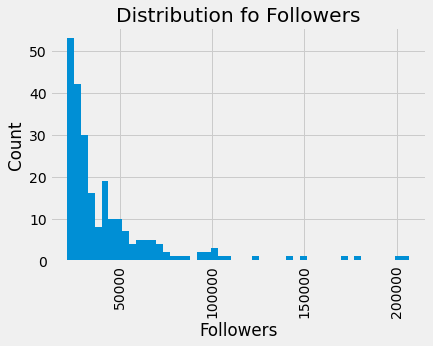

In [39]:
df.followers_count.hist(bins=50
                        , log = False
                       )
plt.xticks(rotation=90)
plt.title('Distribution fo Followers')
plt.ylabel('Count')
plt.xlabel('Followers');